<a href="https://colab.research.google.com/github/steinhaug/stable-diffusion/blob/main/tool/WatermarkLogo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install Pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [39]:
!pip install extcolors

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [55]:
images = ['/content/4fe1664465b96cdd0454b52815b986c0.jpg', '/content/6ddb5041be3fd53ed5c70d614b0bcd71.jpg','/content/c0d3ffd6c00618e2c5159b60b850d061.jpg']
masks  = ['/content/mask2-white.png','/content/mask2-black.png','/content/red-750.png','/content/bottom-right-black.png','/content/bottom-right-green.png','/content/bottom-right-white.png']

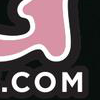

In [27]:
from PIL import Image
import numpy as np

def crop_corner(image, crop_size):
    width, height = image.size
    left = width - crop_size
    upper = height - crop_size
    right = width
    lower = height
    cropped_image = image.crop((left, upper, right, lower))
    return cropped_image

def get_dominant_color(image):
    pixels = np.array(image)
    pixel_count = pixels.shape[0] * pixels.shape[1]
    flattened_pixels = pixels.reshape(pixel_count, -1)
    dominant_color = np.bincount(flattened_pixels).argmax()
    return dominant_color

def apply_logo(image, logo_path, crop_size):
    cropped_image = crop_corner(image, crop_size)
    dominant_color = get_dominant_color(cropped_image)

    logo = Image.open(logo_path)
    logo = logo.resize((crop_size, crop_size))
    logo = logo.convert("RGBA")

    masked_logo = Image.new("RGBA", logo.size)
    for x in range(crop_size):
        for y in range(crop_size):
            r, g, b, a = logo.getpixel((x, y))
            if a > 0:
                masked_logo.putpixel((x, y), (dominant_color[0], dominant_color[1], dominant_color[2], a))

    position = (image.size[0] - crop_size, image.size[1] - crop_size)
    image.paste(masked_logo, position, masked_logo)

    return image

# Usage example
image_path = images[2]
logo_path = masks[2]
crop_size = 100

FIMAGE = Image.open(image_path)

cropped_image = crop_corner(FIMAGE, crop_size)

display( cropped_image )

#modified_image = apply_logo(image, logo_path, crop_size)

#iX, iY = modified_image.size
#display( modified_image.resize(( int(iX / 5) , int(iY / 5))) )


#modified_image.show()  # Display the modified image
#modified_image.save("/content/")  # Save the modified image


3333 5000
1793 2067
New:  574 649  --  574 x 649


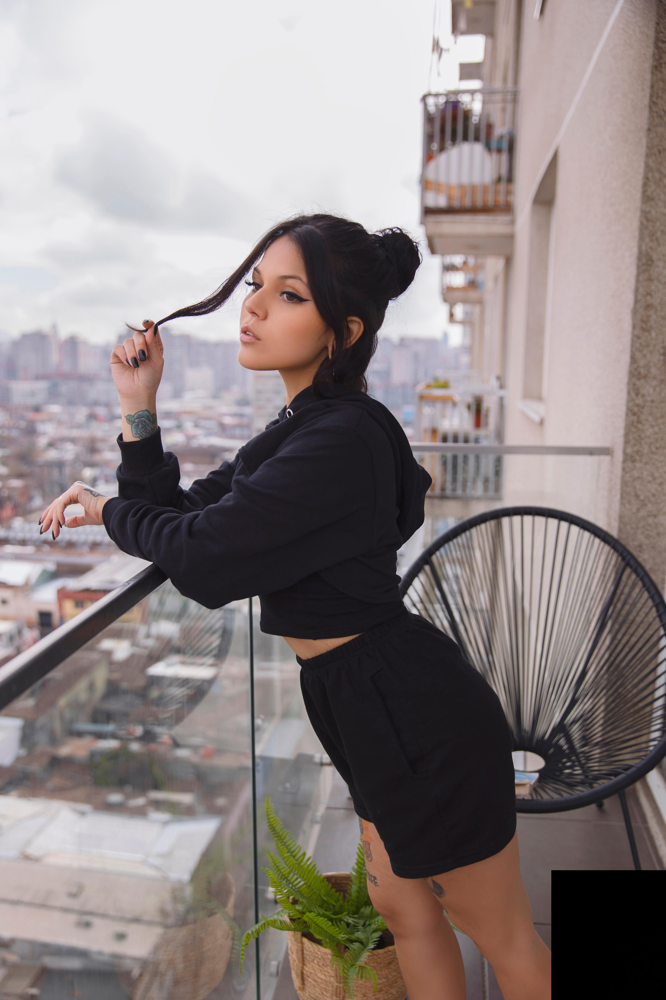

In [64]:
import extcolors

def get_corner_slize(image, ix, iy):
    width, height = image.size
    left = width - ix
    upper = height - iy
    right = width
    lower = height
    cropped_image = image.crop((left, upper, right, lower))
    return cropped_image

def calc__hex_color(image):
    colors, pixel_count = extcolors.extract_from_image( image.resize((32,32)) )
    color = colors.pop(0)
    hexcol = '#{:02x}{:02x}{:02x}'.format( color[0][0], color[0][1] , color[0][2] )
    return hexcol

import os
from PIL import Image

image_file = images[0]

imagePil_Im = Image.open(image_file)
#imagePil_Im = imagePil_Im.convert('RGBA')
imageX, imageY = imagePil_Im.size
print( imageX, imageY)

mask_file = masks[3]
maskPil_Im = Image.open(mask_file)
maskPil_Im = maskPil_Im.convert('RGBA')
maskX, maskY = maskPil_Im.size
print( maskX, maskY)

if imageX > imageY:
    # landscape
    ratioX = int(imageX / 13.4)
    ratioY = int(imageY / 6.0)
    maskPil_Im = maskPil_Im.resize(( ratioX , ratioY ))
else:
    # portrait
    ratioX = int(imageX / 5.8)
    ratioY = int(imageY / 7.7)
    maskPil_Im = maskPil_Im.resize(( ratioX , ratioY ))

maskX, maskY = maskPil_Im.size
print( 'New: ', maskX, maskY, ' -- ', ratioX, 'x', ratioY)


#image_slize = get_corner_slize(imagePil_Im, maskX, int(maskY *  1.1))
#image_slize = get_corner_slize(imagePil_Im, 32, 32)
#hexcol      = calc__hex_color(image_slize)

Image.Image.paste(imagePil_Im, maskPil_Im, (imageX - maskX, imageY - maskY))
imagePil_Im.save(os.path.join("/content/", "testb.jpg"))
display( imagePil_Im.resize(( int(imageX / 5) , int(imageY / 5))) )


#exact_color('image name', resized_width, tolerance, zoom)

